In [1]:
import pandas as pd

In [2]:
cols=['user_id','item_id','rating']

In [3]:
coat_obs = pd.read_csv('../data/coat/train012.txt', sep='\t',names=cols, encoding='latin-1')

In [4]:
coat_obs.head()

,user_id,item_id,rating
0,1,73,0
1,1,137,0
2,1,151,0
3,1,172,0
4,1,189,0


In [5]:
coat_obs.loc[coat_obs.item_id == 73].rating.count()

17

In [6]:
coat_obs.item_id.nunique()


300

In [7]:
num_items = coat_obs.item_id.nunique()
print(num_items) #p(i)

300


In [8]:
def num_ratings_peritem(train, item):
    return train.loc[train.item_id == item].rating.count() #P(train,i)

In [9]:
def popularity(p_train_i, p_i):
    return (p_train_i/p_i)

In [10]:
ratings_73 = num_ratings_peritem(coat_obs,73)

In [11]:
popularity(ratings_73, num_items)

0.056666666666666664

In [12]:
print(17/300)

0.056666666666666664


In [13]:
def odds(p_train_i, p_i):
    p = popularity(p_train_i, p_i)
    return p/(1-p)

In [14]:
odds_73=odds(ratings_73, num_items)
print(odds_73)

0.06007067137809187


In [15]:
x = 17/300
print(x/(1-x))

0.06007067137809187


In [16]:
def p_relevance(train, item):
    ratings_item=train.loc[train.item_id == item].rating
    non_rel = ratings_item[ratings_item <1].count() #this is not a probability tho
    rel = ratings_item[ratings_item >=1].count() #this is not a probability tho
    return rel, non_rel #p(rel,train,i) p(non_rel,train,i)

In [17]:
rel_73, non_rel_73 = p_relevance(coat_obs, 73)
print (rel_73, non_rel_73)

5 12


In [18]:
def p_average(p_rel_train_i, p_non_rel_train_i, p_train_i):
    return (p_rel_train_i/p_train_i), (p_non_rel_train_i/p_train_i)

In [19]:
average_73=p_average(rel_73, non_rel_73, ratings_73)
print(average_73)

(0.29411764705882354, 0.7058823529411765)


In [20]:
def delta(fa, fb):
    return abs(fa - fb)

In [21]:
ratings_85 = num_ratings_peritem(coat_obs,85)
rel_85, non_rel_85 = p_relevance(coat_obs, 85)

In [22]:
odds_85 = odds(ratings_85, num_items)
print(odds_85)

0.10294117647058824


In [23]:
average_85 = p_average(rel_85, non_rel_85, ratings_85)
print (average_85)

(0.39285714285714285, 0.6071428571428571)


In [24]:
delta_odds = delta(odds_73,odds_85)
print(delta_odds)

0.042870505092496375


In [25]:
delta_relevance=delta(average_73[0],average_85[0]) #relevance
print(delta_relevance)

0.09873949579831931


In [26]:
delta_non_relevance=delta(average_73[1],average_85[1])#non_relevance
print(delta_non_relevance)

0.09873949579831942


In [27]:
def steepness(fa, fb):
    return delta(fa,fb)/max(fa,fb)

In [28]:
steepness_odds = steepness(odds_73,odds_85)
print(steepness_odds)

0.41645633518425046


In [29]:
steepness_relevance = steepness(average_73[0],average_85[0])
print(steepness_relevance)

0.2513368983957219


In [30]:
steepness_non_relevance = steepness(average_73[1],average_85[1])
print(steepness_non_relevance)

0.1398809523809525


In [31]:
num_items = 300
#num_items = coat_obs.item_id.nunique()
main_set = list(range(1,num_items+1))
result=[]
for i in main_set:
    sub_set = main_set.copy()
    sub_set.remove(i)
    for j in sub_set:
        result.append([i,j])
r=pd.DataFrame(result)
r.columns = ['a','b']
print (r.head())   

   a  b
0  1  2
1  1  3
2  1  4
3  1  5
4  1  6


In [32]:
r.tail()

,a,b
89695,300,295
89696,300,296
89697,300,297
89698,300,298
89699,300,299


In [33]:
o = pd.DataFrame()

In [34]:
for i in main_set:
    o.at[i,'item']=i  

In [35]:
o['item'].head()

1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
Name: item, dtype: float64

In [36]:
for i in o['item']:
    o.at[i,'ratings']=num_ratings_peritem(coat_obs,i)  

In [37]:
o.head()

,item,ratings
1,1.0,83.0
2,2.0,20.0
3,3.0,14.0
4,4.0,14.0
5,5.0,29.0


In [38]:
o.loc[o['item']==73]

,item,ratings
73,73.0,17.0


In [39]:
for i in o['item']:
    o.at[i,'odds']=odds(o.at[i,'ratings'], num_items)

In [40]:
o.loc[o['item']==73]

,item,ratings,odds
73,73.0,17.0,0.060071


In [41]:
for i in o['item']:
    rele=p_relevance(coat_obs, i)
    o.at[i,'relevant'] = rele[0]
    o.at[i,'non_relevant'] = rele[1]

In [42]:
o.loc[o['item']==73]

,item,ratings,odds,relevant,non_relevant
73,73.0,17.0,0.060071,5.0,12.0


In [43]:
for i in o['item']:
    ave=p_average(o.at[i,'relevant'], o.at[i,'non_relevant'], o.at[i,'ratings'])
    o.at[i,'average_rel'] = ave[0]
    o.at[i,'average_non_rel'] = ave[1]
    

In [44]:
o.loc[o['item']==73]

,item,ratings,odds,relevant,non_relevant,average_rel,average_non_rel
73,73.0,17.0,0.060071,5.0,12.0,0.294118,0.705882


In [45]:
r.loc[r['a']==17]

,a,b
4784,17,1
4785,17,2
4786,17,3
4787,17,4
4788,17,5
...,...,...
5078,17,296
5079,17,297
5080,17,298
5081,17,299


In [47]:
# steepness_odds = steepness(odds_i,odds_j)
# steepness_relevance = steepness(average_i[0],average_j[0])
# steepness_non_relevance = steepness(average_i[1],average_j[1])

In [48]:
for i in o['item']:
    r[r['a']==i]
    

In [49]:
o.head()

,item,ratings,odds,relevant,non_relevant,average_rel,average_non_rel
1,1.0,83.0,0.382488,52.0,31.0,0.626506,0.373494
2,2.0,20.0,0.071429,1.0,19.0,0.050000,0.950000
3,3.0,14.0,0.048951,7.0,7.0,0.500000,0.500000
4,4.0,14.0,0.048951,4.0,10.0,0.285714,0.714286
5,5.0,29.0,0.107011,2.0,27.0,0.068966,0.931034


In [50]:
r.head()

,a,b
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


In [51]:
merged=pd.merge(r,o,left_on='a',right_on='item') #merge with 1st item (a), didn't need to use outer join
print(merged.head())

   a  b  item  ratings      odds  relevant  non_relevant  average_rel  \
0  1  2   1.0     83.0  0.382488      52.0          31.0     0.626506   
1  1  3   1.0     83.0  0.382488      52.0          31.0     0.626506   
2  1  4   1.0     83.0  0.382488      52.0          31.0     0.626506   
3  1  5   1.0     83.0  0.382488      52.0          31.0     0.626506   
4  1  6   1.0     83.0  0.382488      52.0          31.0     0.626506   

   average_non_rel  
0         0.373494  
1         0.373494  
2         0.373494  
3         0.373494  
4         0.373494  


In [52]:
merged.loc[merged['a']==73]

,a,b,item,ratings,odds,relevant,non_relevant,average_rel,average_non_rel
21528,73,1,73.0,17.0,0.060071,5.0,12.0,0.294118,0.705882
21529,73,2,73.0,17.0,0.060071,5.0,12.0,0.294118,0.705882
21530,73,3,73.0,17.0,0.060071,5.0,12.0,0.294118,0.705882
21531,73,4,73.0,17.0,0.060071,5.0,12.0,0.294118,0.705882
21532,73,5,73.0,17.0,0.060071,5.0,12.0,0.294118,0.705882
...,...,...,...,...,...,...,...,...,...
21822,73,296,73.0,17.0,0.060071,5.0,12.0,0.294118,0.705882
21823,73,297,73.0,17.0,0.060071,5.0,12.0,0.294118,0.705882
21824,73,298,73.0,17.0,0.060071,5.0,12.0,0.294118,0.705882
21825,73,299,73.0,17.0,0.060071,5.0,12.0,0.294118,0.705882


In [53]:
merged2=pd.merge(merged,o,left_on='b',right_on='item') #merge also with item b
print(merged2.head())

   a  b  item_x  ratings_x    odds_x  relevant_x  non_relevant_x  \
0  1  2     1.0       83.0  0.382488        52.0            31.0   
1  3  2     3.0       14.0  0.048951         7.0             7.0   
2  4  2     4.0       14.0  0.048951         4.0            10.0   
3  5  2     5.0       29.0  0.107011         2.0            27.0   
4  6  2     6.0       13.0  0.045296         0.0            13.0   

   average_rel_x  average_non_rel_x  item_y  ratings_y    odds_y  relevant_y  \
0       0.626506           0.373494     2.0       20.0  0.071429         1.0   
1       0.500000           0.500000     2.0       20.0  0.071429         1.0   
2       0.285714           0.714286     2.0       20.0  0.071429         1.0   
3       0.068966           0.931034     2.0       20.0  0.071429         1.0   
4       0.000000           1.000000     2.0       20.0  0.071429         1.0   

   non_relevant_y  average_rel_y  average_non_rel_y  
0            19.0           0.05               0.95  
1 

In [54]:
merged2.loc[merged2['a']==73]

,a,b,item_x,ratings_x,odds_x,relevant_x,non_relevant_x,average_rel_x,average_non_rel_x,item_y,ratings_y,odds_y,relevant_y,non_relevant_y,average_rel_y,average_non_rel_y
71,73,2,73.0,17.0,0.060071,5.0,12.0,0.294118,0.705882,2.0,20.0,0.071429,1.0,19.0,0.050000,0.950000
370,73,3,73.0,17.0,0.060071,5.0,12.0,0.294118,0.705882,3.0,14.0,0.048951,7.0,7.0,0.500000,0.500000
669,73,4,73.0,17.0,0.060071,5.0,12.0,0.294118,0.705882,4.0,14.0,0.048951,4.0,10.0,0.285714,0.714286
968,73,5,73.0,17.0,0.060071,5.0,12.0,0.294118,0.705882,5.0,29.0,0.107011,2.0,27.0,0.068966,0.931034
1267,73,6,73.0,17.0,0.060071,5.0,12.0,0.294118,0.705882,6.0,13.0,0.045296,0.0,13.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88277,73,297,73.0,17.0,0.060071,5.0,12.0,0.294118,0.705882,297.0,17.0,0.060071,8.0,9.0,0.470588,0.529412
88576,73,298,73.0,17.0,0.060071,5.0,12.0,0.294118,0.705882,298.0,20.0,0.071429,12.0,8.0,0.600000,0.400000
88875,73,299,73.0,17.0,0.060071,5.0,12.0,0.294118,0.705882,299.0,28.0,0.102941,6.0,22.0,0.214286,0.785714
89174,73,300,73.0,17.0,0.060071,5.0,12.0,0.294118,0.705882,300.0,15.0,0.052632,6.0,9.0,0.400000,0.600000


In [55]:
merged2.loc[merged2['b']==85]

,a,b,item_x,ratings_x,odds_x,relevant_x,non_relevant_x,average_rel_x,average_non_rel_x,item_y,ratings_y,odds_y,relevant_y,non_relevant_y,average_rel_y,average_non_rel_y
24817,1,85,1.0,83.0,0.382488,52.0,31.0,0.626506,0.373494,85.0,28.0,0.102941,11.0,17.0,0.392857,0.607143
24818,2,85,2.0,20.0,0.071429,1.0,19.0,0.050000,0.950000,85.0,28.0,0.102941,11.0,17.0,0.392857,0.607143
24819,3,85,3.0,14.0,0.048951,7.0,7.0,0.500000,0.500000,85.0,28.0,0.102941,11.0,17.0,0.392857,0.607143
24820,4,85,4.0,14.0,0.048951,4.0,10.0,0.285714,0.714286,85.0,28.0,0.102941,11.0,17.0,0.392857,0.607143
24821,5,85,5.0,29.0,0.107011,2.0,27.0,0.068966,0.931034,85.0,28.0,0.102941,11.0,17.0,0.392857,0.607143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25111,296,85,296.0,22.0,0.079137,10.0,12.0,0.454545,0.545455,85.0,28.0,0.102941,11.0,17.0,0.392857,0.607143
25112,297,85,297.0,17.0,0.060071,8.0,9.0,0.470588,0.529412,85.0,28.0,0.102941,11.0,17.0,0.392857,0.607143
25113,298,85,298.0,20.0,0.071429,12.0,8.0,0.600000,0.400000,85.0,28.0,0.102941,11.0,17.0,0.392857,0.607143
25114,299,85,299.0,28.0,0.102941,6.0,22.0,0.214286,0.785714,85.0,28.0,0.102941,11.0,17.0,0.392857,0.607143


finally compute steepness

In [56]:
merged2.head()

,a,b,item_x,ratings_x,odds_x,relevant_x,non_relevant_x,average_rel_x,average_non_rel_x,item_y,ratings_y,odds_y,relevant_y,non_relevant_y,average_rel_y,average_non_rel_y
0,1,2,1.0,83.0,0.382488,52.0,31.0,0.626506,0.373494,2.0,20.0,0.071429,1.0,19.0,0.05,0.95
1,3,2,3.0,14.0,0.048951,7.0,7.0,0.500000,0.500000,2.0,20.0,0.071429,1.0,19.0,0.05,0.95
2,4,2,4.0,14.0,0.048951,4.0,10.0,0.285714,0.714286,2.0,20.0,0.071429,1.0,19.0,0.05,0.95
3,5,2,5.0,29.0,0.107011,2.0,27.0,0.068966,0.931034,2.0,20.0,0.071429,1.0,19.0,0.05,0.95
4,6,2,6.0,13.0,0.045296,0.0,13.0,0.000000,1.000000,2.0,20.0,0.071429,1.0,19.0,0.05,0.95


In [57]:
abs(merged2['odds_x'] - merged2['odds_y'])

0        0.311060
1        0.022478
2        0.022478
3        0.035582
4        0.026132
           ...   
89695    0.303352
89696    0.322418
89697    0.311060
89698    0.279547
89699    0.329857
Length: 89700, dtype: float64

In [58]:
merged2[['odds_x', 'odds_y']].max(axis=1)

0        0.382488
1        0.071429
2        0.071429
3        0.107011
4        0.071429
           ...   
89695    0.382488
89696    0.382488
89697    0.382488
89698    0.382488
89699    0.382488
Length: 89700, dtype: float64

In [59]:
abs(merged2['odds_x'] - merged2['odds_y'])/(merged2[['odds_x', 'odds_y']].max(axis=1))

0        0.813253
1        0.314685
2        0.314685
3        0.332512
4        0.365854
           ...   
89695    0.793100
89696    0.842948
89697    0.813253
89698    0.730865
89699    0.862397
Length: 89700, dtype: float64

In [60]:
def steepness_cols(df, col_name):
    abs(df[col_name+'_x'] - df[col_name+'_y'])/(df[[col_name+'_x', col_name+'_y']].max(axis=1))
    

In [61]:
merged2['steepness_odds'] =abs(merged2['odds_x'] - merged2['odds_y'])/(merged2[['odds_x', 'odds_y']].max(axis=1))

In [62]:
merged2['steepness_relevance'] = abs(merged2['average_rel_x'] - merged2['average_rel_y'])/(merged2[['average_rel_x', 'average_rel_y']].max(axis=1))

In [63]:
merged2['steepness_non_relevance'] = abs(merged2['average_non_rel_x'] - merged2['average_non_rel_y'])/(merged2[['average_non_rel_x', 'average_non_rel_y']].max(axis=1))

In [64]:
merged2.head()

,a,b,item_x,ratings_x,odds_x,relevant_x,non_relevant_x,average_rel_x,average_non_rel_x,item_y,ratings_y,odds_y,relevant_y,non_relevant_y,average_rel_y,average_non_rel_y,steepness_odds,steepness_relevance,steepness_non_relevance
0,1,2,1.0,83.0,0.382488,52.0,31.0,0.626506,0.373494,2.0,20.0,0.071429,1.0,19.0,0.05,0.95,0.813253,0.920192,0.606848
1,3,2,3.0,14.0,0.048951,7.0,7.0,0.500000,0.500000,2.0,20.0,0.071429,1.0,19.0,0.05,0.95,0.314685,0.900000,0.473684
2,4,2,4.0,14.0,0.048951,4.0,10.0,0.285714,0.714286,2.0,20.0,0.071429,1.0,19.0,0.05,0.95,0.314685,0.825000,0.248120
3,5,2,5.0,29.0,0.107011,2.0,27.0,0.068966,0.931034,2.0,20.0,0.071429,1.0,19.0,0.05,0.95,0.332512,0.275000,0.019964
4,6,2,6.0,13.0,0.045296,0.0,13.0,0.000000,1.000000,2.0,20.0,0.071429,1.0,19.0,0.05,0.95,0.365854,1.000000,0.050000


In [65]:
merged2['max_steepness'] = merged2[['steepness_odds','steepness_relevance','steepness_non_relevance']].max(axis=1)

In [66]:
merged2.head()

,a,b,item_x,ratings_x,odds_x,relevant_x,non_relevant_x,average_rel_x,average_non_rel_x,item_y,ratings_y,odds_y,relevant_y,non_relevant_y,average_rel_y,average_non_rel_y,steepness_odds,steepness_relevance,steepness_non_relevance,max_steepness
0,1,2,1.0,83.0,0.382488,52.0,31.0,0.626506,0.373494,2.0,20.0,0.071429,1.0,19.0,0.05,0.95,0.813253,0.920192,0.606848,0.920192
1,3,2,3.0,14.0,0.048951,7.0,7.0,0.500000,0.500000,2.0,20.0,0.071429,1.0,19.0,0.05,0.95,0.314685,0.900000,0.473684,0.900000
2,4,2,4.0,14.0,0.048951,4.0,10.0,0.285714,0.714286,2.0,20.0,0.071429,1.0,19.0,0.05,0.95,0.314685,0.825000,0.248120,0.825000
3,5,2,5.0,29.0,0.107011,2.0,27.0,0.068966,0.931034,2.0,20.0,0.071429,1.0,19.0,0.05,0.95,0.332512,0.275000,0.019964,0.332512
4,6,2,6.0,13.0,0.045296,0.0,13.0,0.000000,1.000000,2.0,20.0,0.071429,1.0,19.0,0.05,0.95,0.365854,1.000000,0.050000,1.000000


In [67]:
import numpy as np

In [68]:
merged2['max_steepness_label'] = np.where(merged2['max_steepness'] == merged2['steepness_odds'], 'odds', np.where(merged2['max_steepness'] == merged2['steepness_relevance'], 'relevance',np.where(merged2['max_steepness'] == merged2['steepness_non_relevance'], 'non_relevance','y')))

In [69]:
merged2.head(10)

,a,b,item_x,ratings_x,odds_x,relevant_x,non_relevant_x,average_rel_x,average_non_rel_x,item_y,...,odds_y,relevant_y,non_relevant_y,average_rel_y,average_non_rel_y,steepness_odds,steepness_relevance,steepness_non_relevance,max_steepness,max_steepness_label
0,1,2,1.0,83.0,0.382488,52.0,31.0,0.626506,0.373494,2.0,...,0.071429,1.0,19.0,0.05,0.95,0.813253,0.920192,0.606848,0.920192,relevance
1,3,2,3.0,14.0,0.048951,7.0,7.0,0.500000,0.500000,2.0,...,0.071429,1.0,19.0,0.05,0.95,0.314685,0.900000,0.473684,0.900000,relevance
2,4,2,4.0,14.0,0.048951,4.0,10.0,0.285714,0.714286,2.0,...,0.071429,1.0,19.0,0.05,0.95,0.314685,0.825000,0.248120,0.825000,relevance
3,5,2,5.0,29.0,0.107011,2.0,27.0,0.068966,0.931034,2.0,...,0.071429,1.0,19.0,0.05,0.95,0.332512,0.275000,0.019964,0.332512,odds
4,6,2,6.0,13.0,0.045296,0.0,13.0,0.000000,1.000000,2.0,...,0.071429,1.0,19.0,0.05,0.95,0.365854,1.000000,0.050000,1.000000,relevance
5,7,2,7.0,14.0,0.048951,3.0,11.0,0.214286,0.785714,2.0,...,0.071429,1.0,19.0,0.05,0.95,0.314685,0.766667,0.172932,0.766667,relevance
6,8,2,8.0,19.0,0.067616,4.0,15.0,0.210526,0.789474,2.0,...,0.071429,1.0,19.0,0.05,0.95,0.053381,0.762500,0.168975,0.762500,relevance
7,9,2,9.0,21.0,0.075269,4.0,17.0,0.190476,0.809524,2.0,...,0.071429,1.0,19.0,0.05,0.95,0.051020,0.737500,0.147870,0.737500,relevance
8,10,2,10.0,21.0,0.075269,7.0,14.0,0.333333,0.666667,2.0,...,0.071429,1.0,19.0,0.05,0.95,0.051020,0.850000,0.298246,0.850000,relevance
9,11,2,11.0,19.0,0.067616,5.0,14.0,0.263158,0.736842,2.0,...,0.071429,1.0,19.0,0.05,0.95,0.053381,0.810000,0.224377,0.810000,relevance


In [70]:
merged2['max_steep_odds_rel'] = merged2[['steepness_odds','steepness_relevance']].max(axis=1)

In [71]:
merged2['max_steep_odds_non_rel'] = merged2[['steepness_odds','steepness_non_relevance']].max(axis=1)

In [72]:
merged2['max_steep_rel_non_rel'] = merged2[['steepness_relevance','steepness_non_relevance']].max(axis=1)

In [73]:
merged2['max_steep_odds_rel_label'] = np.where(merged2['max_steep_odds_rel'] == merged2['steepness_odds'], 'odds', np.where(merged2['max_steep_odds_rel'] == merged2['steepness_relevance'], 'relevance', 'y'))

In [74]:
merged2['max_steep_odds_non_rel_label'] = np.where(merged2['max_steep_odds_non_rel'] == merged2['steepness_odds'], 'odds', np.where(merged2['max_steep_odds_non_rel'] == merged2['steepness_non_relevance'], 'non_relevance', 'y'))

In [75]:
merged2['max_steep_rel_non_rel_label'] = np.where(merged2['max_steep_rel_non_rel'] == merged2['steepness_relevance'], 'relevance', np.where(merged2['max_steep_rel_non_rel'] == merged2['steepness_non_relevance'], 'non_relevance', 'y'))

In [76]:
import matplotlib.pyplot as plt

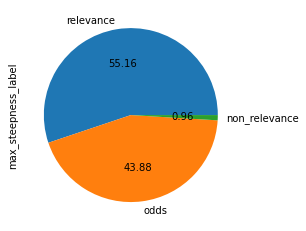

In [77]:
merged2['max_steepness_label'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

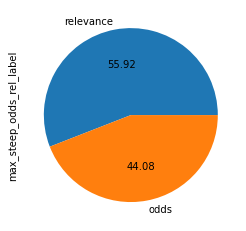

In [78]:
merged2['max_steep_odds_rel_label'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

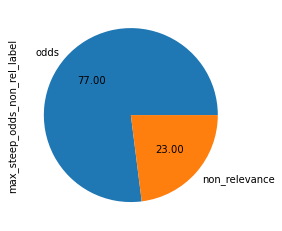

In [79]:
merged2['max_steep_odds_non_rel_label'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

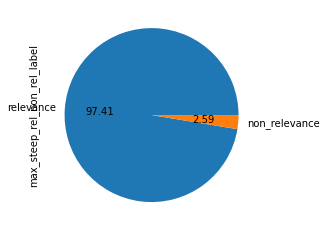

In [80]:
merged2['max_steep_rel_non_rel_label'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()